In [36]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt 
educ = gpd.read_file('data /acs2019_5yr_B15003_14000US06037601212.geojson')

In [37]:
educ.geoid.tail()

27    14000US06037601900
28    14000US06037602003
29    14000US06037602004
30    14000US06037602104
31    14000US06037703002
Name: geoid, dtype: object

In [38]:
educ.geoid.head()

0    14000US06037600501
1    14000US06037600502
2    14000US06037600601
3    14000US06037600602
4    14000US06037600702
Name: geoid, dtype: object

<AxesSubplot:>

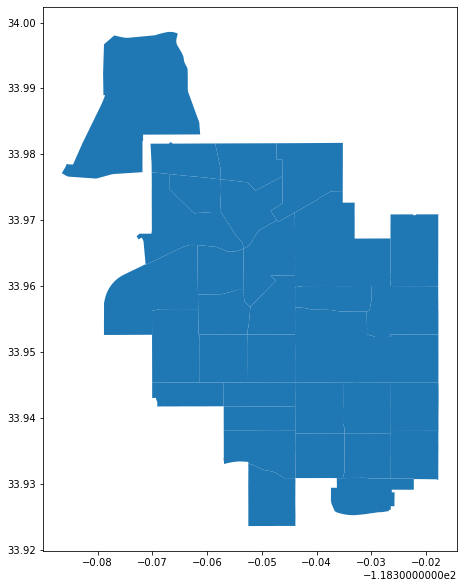

In [39]:
educ.plot(figsize=(10,10))

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# right here, we are telling python top show us one row with all the columns
# within our data file.

In [41]:
educ.sample()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",B15003005,"B15003005, Error",B15003006,"B15003006, Error",B15003007,"B15003007, Error",B15003008,"B15003008, Error",B15003009,"B15003009, Error",B15003010,"B15003010, Error",B15003011,"B15003011, Error",B15003012,"B15003012, Error",B15003013,"B15003013, Error",B15003014,"B15003014, Error",B15003015,"B15003015, Error",B15003016,"B15003016, Error",B15003017,"B15003017, Error",B15003018,"B15003018, Error",B15003019,"B15003019, Error",B15003020,"B15003020, Error",B15003021,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
20,14000US06037601303,"Census Tract 6013.03, Los Angeles, CA",3378.0,253.0,43.0,39.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,16.0,24.0,26.0,40.0,0.0,17.0,125.0,94.0,65.0,67.0,15.0,17.0,0.0,17.0,10.0,16.0,9.0,14.0,126.0,77.0,484.0,137.0,22.0,20.0,200.0,91.0,1067.0,203.0,313.0,113.0,685.0,173.0,143.0,84.0,19.0,32.0,10.0,15.0,"MULTIPOLYGON (((-118.36682 33.97702, -118.3662..."


In [42]:
columns_to_keep = ['geoid',
 'name',
 'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']

In [43]:
educ = educ[columns_to_keep]

In [44]:
educ.head(1)

,geoid,name,B15003001,B15003002,B15003003,B15003004,B15003005,B15003006,B15003007,B15003008,B15003009,B15003010,B15003011,B15003012,B15003013,B15003014,B15003015,B15003016,B15003017,B15003018,B15003019,B15003020,B15003021,B15003022,B15003023,B15003024,B15003025,geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,51.0,0.0,0.0,0.0,4.0,0.0,0.0,20.0,19.0,6.0,0.0,5.0,22.0,26.0,40.0,377.0,17.0,112.0,504.0,187.0,324.0,116.0,6.0,21.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."


In [45]:
educ.columns = ['geoid',
 'name',
 'Total',
 'No Schooling Completed',                
 'Nursery School',
 'Kindergarten',
 '1st Grade',            
 '2nd Grade',
 '3rd Grade',
 '4th Grade',
 '5th Grade',           
 '6th Grade',
 '7th Grade',
 '8th Grade',
 '9th Grade',           
 '10th Grade',
 '11th Grade',           
 '12th Grade, No Diploma',
 'Regular High School Diploma',
 'GED or Alternative Credential',
 'Some College, Less than 1 year',            
 'Some College, 1 or more years, No Degree',                      
 'Associates Degree',
 'Bachelors Degree',
 'Masters Degree',
 'Professional School Degree',           
 'Doctorate Degree',
 'geometry']

In [46]:
educ.head()

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,51.0,0.0,0.0,0.0,4.0,0.0,0.0,20.0,19.0,6.0,0.0,5.0,22.0,26.0,40.0,377.0,17.0,112.0,504.0,187.0,324.0,116.0,6.0,21.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",1580.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,59.0,0.0,37.0,64.0,0.0,21.0,30.0,326.0,38.0,61.0,266.0,159.0,298.0,47.0,13.0,26.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373..."
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",1910.0,72.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,43.0,0.0,6.0,31.0,53.0,388.0,28.0,116.0,433.0,155.0,351.0,181.0,0.0,22.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264..."
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",1437.0,82.0,0.0,0.0,0.0,0.0,28.0,15.0,7.0,64.0,10.0,46.0,65.0,31.0,29.0,15.0,463.0,20.0,97.0,243.0,95.0,76.0,51.0,0.0,0.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351..."
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",3227.0,133.0,8.0,0.0,0.0,0.0,0.0,23.0,36.0,48.0,0.0,0.0,0.0,0.0,41.0,83.0,644.0,86.0,305.0,621.0,231.0,503.0,368.0,59.0,38.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439..."


In [47]:
educ['less_hs'] = educ['No Schooling Completed']+educ['Nursery School']+educ['Kindergarten']+educ['1st Grade']+educ['2nd Grade']+educ['3rd Grade']+educ['4th Grade']+educ['5th Grade']+educ['6th Grade']+educ['7th Grade']+educ['8th Grade']+educ['9th Grade']+educ['10th Grade']+educ['11th Grade']+educ['12th Grade, No Diploma']

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [48]:
educ.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   geoid                                     32 non-null     object  
 1   name                                      32 non-null     object  
 2   Total                                     32 non-null     float64 
 3   No Schooling Completed                    32 non-null     float64 
 4   Nursery School                            32 non-null     float64 
 5   Kindergarten                              32 non-null     float64 
 6   1st Grade                                 32 non-null     float64 
 7   2nd Grade                                 32 non-null     float64 
 8   3rd Grade                                 32 non-null     float64 
 9   4th Grade                                 32 non-null     float64 
 10  5th Grade           

In [49]:
educ.head(1)

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry,less_hs
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,51.0,0.0,0.0,0.0,4.0,0.0,0.0,20.0,19.0,6.0,0.0,5.0,22.0,26.0,40.0,377.0,17.0,112.0,504.0,187.0,324.0,116.0,6.0,21.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264...",193.0


In [50]:
educ['hs_eq'] = educ['Regular High School Diploma']+educ['GED or Alternative Credential']

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [51]:
educ['some_college'] = educ['Some College, Less than 1 year']+educ['Some College, 1 or more years, No Degree']+educ['Associates Degree']

In [52]:
educ.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   geoid                                     32 non-null     object  
 1   name                                      32 non-null     object  
 2   Total                                     32 non-null     float64 
 3   No Schooling Completed                    32 non-null     float64 
 4   Nursery School                            32 non-null     float64 
 5   Kindergarten                              32 non-null     float64 
 6   1st Grade                                 32 non-null     float64 
 7   2nd Grade                                 32 non-null     float64 
 8   3rd Grade                                 32 non-null     float64 
 9   4th Grade                                 32 non-null     float64 
 10  5th Grade           

In [53]:
educ['ba_bs'] = educ['Bachelors Degree']

In [54]:
educ['masters_eq'] = educ['Masters Degree']+educ['Professional School Degree']

In [55]:
educ.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   geoid                                     32 non-null     object  
 1   name                                      32 non-null     object  
 2   Total                                     32 non-null     float64 
 3   No Schooling Completed                    32 non-null     float64 
 4   Nursery School                            32 non-null     float64 
 5   Kindergarten                              32 non-null     float64 
 6   1st Grade                                 32 non-null     float64 
 7   2nd Grade                                 32 non-null     float64 
 8   3rd Grade                                 32 non-null     float64 
 9   4th Grade                                 32 non-null     float64 
 10  5th Grade           

In [56]:
educ['doctorate'] = educ['Doctorate Degree']

In [57]:
educ.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   geoid                                     32 non-null     object  
 1   name                                      32 non-null     object  
 2   Total                                     32 non-null     float64 
 3   No Schooling Completed                    32 non-null     float64 
 4   Nursery School                            32 non-null     float64 
 5   Kindergarten                              32 non-null     float64 
 6   1st Grade                                 32 non-null     float64 
 7   2nd Grade                                 32 non-null     float64 
 8   3rd Grade                                 32 non-null     float64 
 9   4th Grade                                 32 non-null     float64 
 10  5th Grade           

In [58]:
educ[['geoid','name','Total','geometry','less_hs','hs_eq','some_college','ba_bs','masters_eq','doctorate']]

,geoid,name,Total,geometry,less_hs,hs_eq,some_college,ba_bs,masters_eq,doctorate
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264...",193.0,394.0,803.0,324.0,122.0,21.0
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",1580.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373...",346.0,364.0,486.0,298.0,60.0,26.0
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",1910.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264...",236.0,416.0,704.0,351.0,181.0,22.0
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",1437.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351...",392.0,483.0,435.0,76.0,51.0,0.0
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",3227.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439...",372.0,730.0,1157.0,503.0,427.0,38.0
5,14000US06037600703,"Census Tract 6007.03, Los Angeles, CA",1421.0,"MULTIPOLYGON (((-118.34392 33.95796, -118.3439...",18.0,194.0,514.0,473.0,204.0,18.0
6,14000US06037600704,"Census Tract 6007.04, Los Angeles, CA",2701.0,"MULTIPOLYGON (((-118.33083 33.95608, -118.3306...",202.0,538.0,1120.0,545.0,289.0,7.0
7,14000US06037600801,"Census Tract 6008.01, Los Angeles, CA",2341.0,"MULTIPOLYGON (((-118.32662 33.96180, -118.3265...",111.0,515.0,904.0,495.0,305.0,11.0
8,14000US06037600802,"Census Tract 6008.02, Los Angeles, CA",2067.0,"MULTIPOLYGON (((-118.34405 33.97116, -118.3428...",185.0,648.0,657.0,406.0,152.0,19.0
9,14000US06037600902,"Census Tract 6009.02, Los Angeles, CA",4233.0,"MULTIPOLYGON (((-118.35764 33.97457, -118.3576...",932.0,884.0,1554.0,632.0,196.0,35.0


<AxesSubplot:>

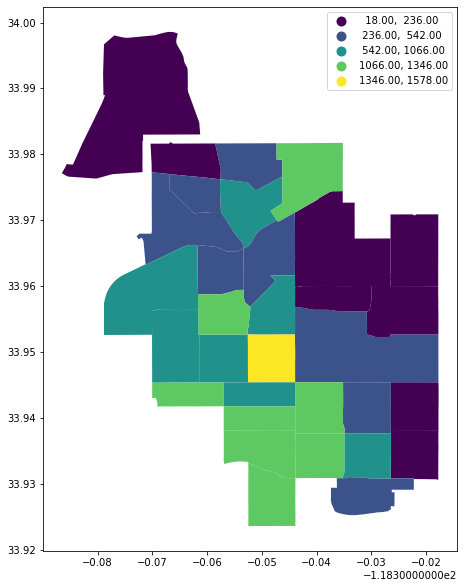

In [59]:
educ.plot(figsize=(12,10),
                 column='less_hs',
                 legend=True, 
                 scheme='NaturalBreaks')

In [60]:
educ.sample(1)

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry,less_hs,hs_eq,some_college,ba_bs,masters_eq,doctorate
9,14000US06037600902,"Census Tract 6009.02, Los Angeles, CA",4233.0,106.0,0.0,0.0,37.0,38.0,0.0,0.0,50.0,132.0,25.0,136.0,72.0,18.0,201.0,117.0,744.0,140.0,191.0,1007.0,356.0,632.0,154.0,42.0,35.0,"MULTIPOLYGON (((-118.35764 33.97457, -118.3576...",932.0,884.0,1554.0,632.0,196.0,35.0


In [61]:
educ.sample(1)

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry,less_hs,hs_eq,some_college,ba_bs,masters_eq,doctorate
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",1910.0,72.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,43.0,0.0,6.0,31.0,53.0,388.0,28.0,116.0,433.0,155.0,351.0,181.0,0.0,22.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264...",236.0,416.0,704.0,351.0,181.0,22.0


<AxesSubplot:>

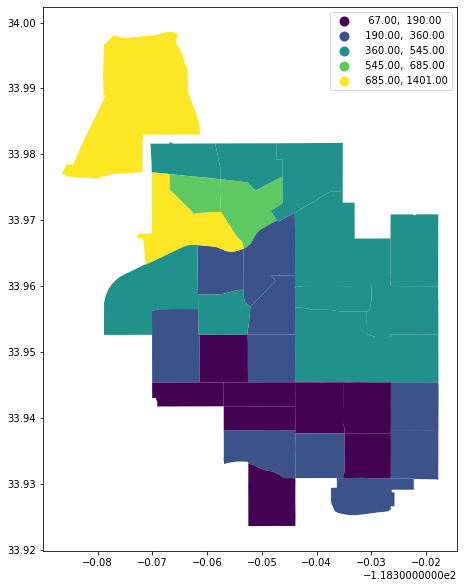

In [62]:
educ.plot(figsize=(12,10),
                 column='ba_bs',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:ylabel='Frequency'>

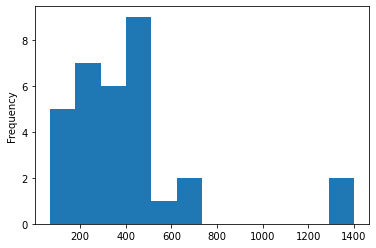

In [64]:
educ['ba_bs'].plot.hist(bins=12)


Text(0.5, 1.0, 'BA/BS Degree')

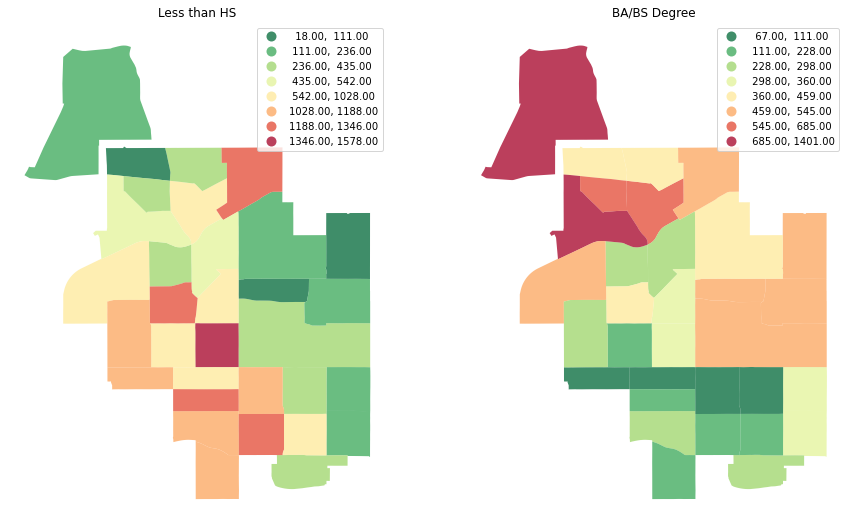

In [65]:

# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
educ.plot(column='less_hs', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=8, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Less than HS")

# percent black map on the right
educ.plot(column='ba_bs', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=8, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("BA/BS Degree")